## CAPSTONE PROJECT - BATTLE OF THE NEIGHBOURHOODS

## BUISNESS PROBLEM: Opening a new shopping mall in Lagos, Nigeria

## DATA: 
The data used in this project were gotten by the following:

1.Geopy - For getting the co-ordinates of different locations. 

2.Foursquare API - To get the list of venues and the details around a given location. 

3.Wikipedia - To get the Localities/neigb in Lagos

##  IMPORTING LIBRARIES

In [1]:
! pip install geopy
print ('Successful!')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Successful!


In [2]:
# importing other important libraries
#Importing required libraries
import numpy as np #library to handle data in a vectorized manner
import pandas as pd #library for data analysis

try:
    import geocoder #for the coordinates
except:
    !pip install geocoder
    import geocoder

import requests
try:
    import folium #for map
except:
    !pip install folium
    import folium


import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans #importing kmeans clustering 

import warnings
warnings.filterwarnings('ignore')

print ('Done')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 98 kB 10.0 MB/s eta 0:00:01
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |██████████████████████████

## GETTING THE LOCATIONS

In [4]:
# Using gecoder to get the coordinates of Lagos
g = geocoder.arcgis('Lagos, Nigeria')
Lagos_lat = g.latlng[0]
Lagos_lng = g.latlng[1]
print ('The Latitude and Longitude of Lagos are {} and {}'.format(Lagos_lat, Lagos_lng))

The Latitude and Longitude of Lagos are 6.454700000000059 and 3.3887600000000475


In [5]:
#Scraping the table from wikipedia
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_Lagos_State_local_government_areas_by_population')[2]
df

,Rank,LGA,Population
0,1,Alimosho,11456783
1,2,Ajeromi-Ifelodun,2000346
2,3,Kosofe,665421
3,4,Mushin,633543
4,5,Oshodi-Isolo,1621789
5,6,Ojo,598336
6,7,Ikorodu,535811
7,8,Surulere,504409
8,9,Agege,461123
9,10,Ifako-Ijaiye,428812


## DATA CLEANING AND EXPLORATION

In [6]:
# dropping the 'Rank' column
df.drop(columns = 'Rank', axis = 1, inplace= True)
df

,LGA,Population
0,Alimosho,11456783
1,Ajeromi-Ifelodun,2000346
2,Kosofe,665421
3,Mushin,633543
4,Oshodi-Isolo,1621789
5,Ojo,598336
6,Ikorodu,535811
7,Surulere,504409
8,Agege,461123
9,Ifako-Ijaiye,428812


In [7]:
#renaming LGA to Neighbourhood
df.rename(columns = {'LGA':'Neighbourhood'}, inplace = True)
df

,Neighbourhood,Population
0,Alimosho,11456783
1,Ajeromi-Ifelodun,2000346
2,Kosofe,665421
3,Mushin,633543
4,Oshodi-Isolo,1621789
5,Ojo,598336
6,Ikorodu,535811
7,Surulere,504409
8,Agege,461123
9,Ifako-Ijaiye,428812


### Getting the locations of the cities

In [8]:
# defining a function to obtain all the coordinates of the neighbourhoods
def get_location(Neighbourhood):
    g = geocoder.arcgis('{}, Lagos,Nigeria'.format(Neighbourhood))
    get_latlng = g.latlng
    return get_latlng

In [9]:
coordinates = []
for a in df['Neighbourhood']. tolist():
    coordinates.append(get_location(a))
print (coordinates)

[[6.609270000000038, 3.255800000000022], [6.459410000000048, 3.3405500000000643], [6.599990000000048, 3.4150900000000206], [6.53174000000007, 3.3470100000000684], [6.521350000000041, 3.3186300000000415], [6.462620000000072, 3.166960000000074], [6.6235600000000545, 3.5048300000000268], [6.489320000000021, 3.358000000000061], [6.6256100000000515, 3.312620000000038], [6.651110000000074, 3.3232900000000427], [6.537850000000049, 3.385340000000042], [6.445430000000044, 3.2675400000000536], [6.506430000000023, 3.375530000000026], [6.607760000000042, 3.348540000000071], [6.4666800000000535, 3.5832600000000525], [6.432160000000067, 2.89265000000006], [6.437950000000058, 3.3643600000000333], [6.454700000000059, 3.3887600000000475], [6.583750000000066, 3.975530000000049], [6.5036700000000565, 3.7330100000000357]]


In [10]:
# creating a dataframe with the locations
coordinates_df = pd.DataFrame(coordinates, columns = ['Latitudes', 'Longitudes'])
coordinates_df.head()


,Latitudes,Longitudes
0,6.60927,3.25580
1,6.45941,3.34055
2,6.59999,3.41509
3,6.53174,3.34701
4,6.52135,3.31863


In [11]:
# Adding the coordinates to the dataframe
df["Latitudes"] = coordinates_df["Latitudes"]
df["Longitudes"] = coordinates_df["Longitudes"]
df.head()


,Neighbourhood,Population,Latitudes,Longitudes
0,Alimosho,11456783,6.60927,3.25580
1,Ajeromi-Ifelodun,2000346,6.45941,3.34055
2,Kosofe,665421,6.59999,3.41509
3,Mushin,633543,6.53174,3.34701
4,Oshodi-Isolo,1621789,6.52135,3.31863


In [12]:
#Creating the map for the Neighbourhoods 
Lagos_map = folium.Map(location=[Lagos_lat, Lagos_lng],zoom_start=12)

#adding markers to the map for the Neighbourhoods
folium.Marker([Lagos_lat, Lagos_lng], popup='Lagos', tooltip="Click to view").add_to(Lagos_map)


#looping through the cities
for latitude,longitude, name in zip(df["Latitudes"], df["Longitudes"], df["Neighbourhood"]):
    folium.CircleMarker([latitude, longitude],
        radius=8,
        color='blue',
        popup=name,
        fill=True,
        fill_color='yellow',
        fill_opacity=0.9
    ).add_to(Lagos_map)
Lagos_map


Click [here](https://nbviewer.jupyter.org/github/Veraemereuwa/Opening-a-new-shopping-mall-in-Lagos-Nigeria/blob/master/Capstoneproject.ipynb) to view the folium map

### Using FOURSQUARE API to get the various venues in the Neighbourhood

In [13]:
CLIENT_ID = 'WRXGQM1GSP4FUXH0PKWIUKR2RVU2Z2VUNHR0QJLKB0Q5FLMY' #Foursquare ID
CLIENT_SECRET = 'EEE2AHMWZNP44FLMN10H3AF2EU3XNAMRK4APESNHDO3BIKYC' #Foursquare Secret key
VERSION = 20201231 #Foursqaure version
LIMIT = 100 # A default Foursquare API limit value
print ('Done')

Done


In [14]:
#Defining a function to get all the venues in the neighbourhood
def getNearbyVenues(names, latitudes, longitudes, radius=3000):

    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        venues_list.append([(name, lat, lng, v['venue']['name'],
                             v['venue']['categories'][0]['name'])
                            for v in results])

    nearby_venues = pd.DataFrame(
        [item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 'Neighbourhood Latitude',
        'Neighbourhood Longitude', 'Venue', 'Venue Category']

    return (nearby_venues)

In [15]:
# Use the function created above to obtain Venues and Venue Catgories for each Neighbourhood
Lagos_venues = getNearbyVenues(names=df['Neighbourhood'],
                                 latitudes=df['Latitudes'],
                                 longitudes=df['Longitudes'])
Lagos_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Category
0,Alimosho,6.60927,3.2558,De Grange suites & bar,Bar
1,Alimosho,6.60927,3.2558,LAMOO PIZZA & SHAWARMA,Pizza Place
2,Alimosho,6.60927,3.2558,Ipaja market ipaja,Market
3,Alimosho,6.60927,3.2558,Goodtime Fast Food,Fast Food Restaurant
4,Alimosho,6.60927,3.2558,Baruwa,Bus Station


### Analysing the foursquare data

In [16]:
#Number of venues for each Neighbourhood
Lagos_venues.groupby(['Neighbourhood']).count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Category
Neighbourhood,,,,
Agege,10,10,10,10
Ajeromi-Ifelodun,10,10,10,10
Alimosho,5,5,5,5
Amuwo-Odofin,11,11,11,11
Apapa,11,11,11,11
Badagry,7,7,7,7
Epe,1,1,1,1
Eti-Osa,13,13,13,13
Ibeju-Lekki,2,2,2,2


In [17]:
#List of categories
print('Total number of unique categories are {}'.format(len(Lagos_venues['Venue Category'].unique().tolist())))
#First 10 categories
Lagos_venues['Venue Category'].unique().tolist()

Total number of unique categories are 88


['Bar',
 'Pizza Place',
 'Market',
 'Fast Food Restaurant',
 'Bus Station',
 'Hotel',
 'Playground',
 'Bike Rental / Bike Share',
 'Bakery',
 'Bank',
 'Convenience Store',
 'Rest Area',
 'Dog Run',
 'IT Services',
 'Shopping Mall',
 'Cupcake Shop',
 'Flea Market',
 'Music Venue',
 'Burger Joint',
 'Boutique',
 'Electronics Store',
 'Diner',
 'Food Court',
 'Wine Shop',
 'Motel',
 'BBQ Joint',
 'Breakfast Spot',
 'Light Rail Station',
 'Sports Bar',
 'Stadium',
 'Park',
 'Beach',
 'Historic Site',
 'Auto Workshop',
 'African Restaurant',
 'Café',
 'Plaza',
 'Water Park',
 'Boat or Ferry',
 'Multiplex',
 'Movie Theater',
 'Nightclub',
 'Soccer Field',
 'Art Gallery',
 'Clothing Store',
 'Bus Stop',
 'Noodle House',
 'Pharmacy',
 'Basketball Court',
 'Liquor Store',
 'Campground',
 'Mobile Phone Shop',
 'Fried Chicken Joint',
 'Farmers Market',
 'Department Store',
 'Lounge',
 'Arts & Entertainment',
 'Food & Drink Shop',
 'Harbor / Marina',
 'Gym / Fitness Center',
 'Hot Dog Joint',
 'Op

### One Hot Encoding
To convert the venues to numerical values as machine learning algorithms cannot work with cateegorical data directly

In [18]:
# One hot encoding
Lagos_onehot = pd.get_dummies(Lagos_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood name column back to dataframe
Lagos_onehot['Neighbourhood'] = Lagos_venues['Neighbourhood']

# move the Neighbourhood column to the first column
Lagos_onehot = Lagos_onehot[ [ 'Neighbourhood' ] + [ col for col in Lagos_onehot.columns if col!='Neighbourhood' ] ]
Lagos_onehot.head()

,Neighbourhood,African Restaurant,Airport,Airport Lounge,Airport Terminal,Art Gallery,Arts & Entertainment,Auto Workshop,BBQ Joint,Bakery,...,Restaurant,Salon / Barbershop,Shopping Mall,Soccer Field,Sports Bar,Stadium,Steakhouse,Vegetarian / Vegan Restaurant,Water Park,Wine Shop
0,Alimosho,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alimosho,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alimosho,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Alimosho,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Alimosho,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#Grouping the venues categories
Lagos_grouped = Lagos_onehot.groupby('Neighbourhood').sum().reset_index()
Lagos_grouped.head()

,Neighbourhood,African Restaurant,Airport,Airport Lounge,Airport Terminal,Art Gallery,Arts & Entertainment,Auto Workshop,BBQ Joint,Bakery,...,Restaurant,Salon / Barbershop,Shopping Mall,Soccer Field,Sports Bar,Stadium,Steakhouse,Vegetarian / Vegan Restaurant,Water Park,Wine Shop
0,Agege,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Ajeromi-Ifelodun,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Alimosho,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Amuwo-Odofin,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Apapa,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0


This analysis is just for shopping mall, so we would need to get only thr neighbourhoods that have shopping malls

In [20]:
#numbers of Neighbourhoods having Shopping malls
len(Lagos_grouped[Lagos_grouped['Shopping Mall'] > 0])

8

8 Neighbourhoods have shopping malls

In [34]:
#Lets create a dataframe for shopping mall
Shoppingmall_df = Lagos_grouped[['Neighbourhood', 'Shopping Mall']]
Shoppingmall_df.head()

,Neighbourhood,Shopping Mall
0,Agege,1
1,Ajeromi-Ifelodun,0
2,Alimosho,0
3,Amuwo-Odofin,0
4,Apapa,2


 Lets check the number of shoppingmalls each neighbourhood has

In [22]:
# calulate the total number of essential venues per neighbourhood
Shoppingmall_df['Total']=Shoppingmall_df.sum(axis=1)

# Create new dataframe to store all neighbourhoods and their total number of venues
total_shoppingmalls=Shoppingmall_df[['Neighbourhood','Total']]
total_shoppingmalls.sort_values(by=['Total'], ascending=False).head()

,Neighbourhood,Total
19,Surulere,4
14,Lagos Mainland,4
4,Apapa,2
13,Lagos Island,2
10,Ikeja,2


## Machine Learning Algorithim (Kmeans)
This is an unsupervised machine learning algorithim that works by grouping data into k number of clusters.
It groups data with similar characteristics in the same cluster.

First, we need to determine the number of clusters we need, and this is done using the elbow method

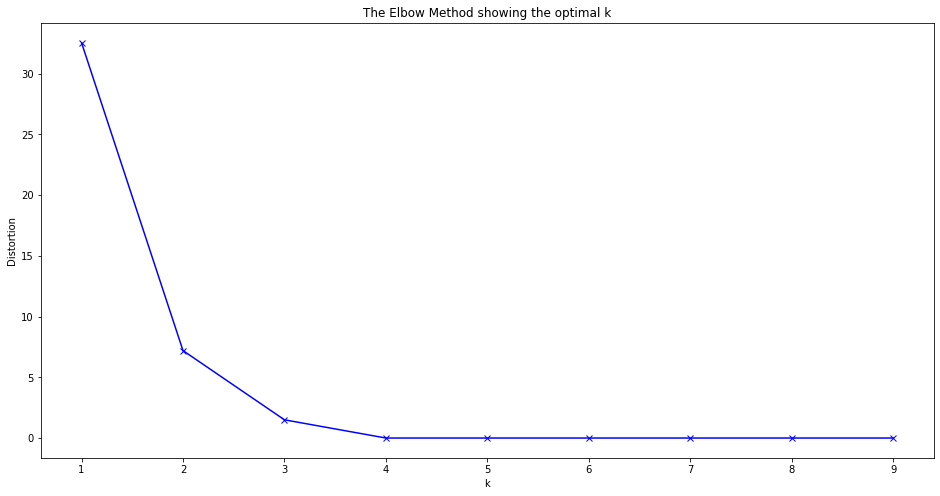

In [23]:
# Creating a new dataframe and dropping 'Neighbourhood' column 
shoppingmall_clustering = total_shoppingmalls.drop('Neighbourhood', 1).copy(deep = True)
distortions = [] # Storing results on distortions in a list
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k) # Initializing the kMeans model
    kmeanModel.fit(shoppingmall_clustering) # Fitting the model to dataset
    distortions.append(kmeanModel.inertia_) # Appending distortions to list for each k value
    
# plotting using matplotlib
plt.figure(figsize=(16, 8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In the plot above the elbow is at k=3 indicating the optimal k for this dataset is 3

### Clustering the neighbourhoods

In [24]:
#Dataframe for clustering
shoppingmall_clustering = Shoppingmall_df.drop(['Neighbourhood'], 1)

#run K-means clustering
k_means = KMeans(init="random", n_clusters=3, n_init=12).fit(shoppingmall_clustering)

#getting the labels for first 15 Neighbourhoods
print(k_means.labels_[0:15])

[0 1 1 1 0 1 1 1 0 1 0 1 1 0 2]


In [25]:
#Creating a dataframe
shoppingmall_labels = Shoppingmall_df.copy()

#adding labels
shoppingmall_labels["Cluster Label"] = k_means.labels_

#converting cluster labels to integer
shoppingmall_labels['Cluster Label'] = shoppingmall_labels['Cluster Label'].astype('int64')

shoppingmall_labels.head()

,Neighbourhood,Shopping Mall,Total,Cluster Label
0,Agege,1,1,0
1,Ajeromi-Ifelodun,0,0,1
2,Alimosho,0,0,1
3,Amuwo-Odofin,0,0,1
4,Apapa,2,2,0


In [26]:
#Merging the shoppingmall_labels and first dataframe(df) to get the latitude and longitudes for each neighbourhood
shoppingmall_labels = shoppingmall_labels.join(df.set_index('Neighbourhood'), on='Neighbourhood')
shoppingmall_labels.head()

,Neighbourhood,Shopping Mall,Total,Cluster Label,Population,Latitudes,Longitudes
0,Agege,1,1,0,461123,6.62561,3.31262
1,Ajeromi-Ifelodun,0,0,1,2000346,6.45941,3.34055
2,Alimosho,0,0,1,11456783,6.60927,3.25580
3,Amuwo-Odofin,0,0,1,318576,6.44543,3.26754
4,Apapa,2,2,0,217661,6.43795,3.36436


In [27]:
#Lets drop the 'Total' column
shoppingmall_labels.drop(['Total'], axis = 1, inplace = True)
shoppingmall_labels

,Neighbourhood,Shopping Mall,Cluster Label,Population,Latitudes,Longitudes
0,Agege,1,0,461123,6.62561,3.31262
1,Ajeromi-Ifelodun,0,1,2000346,6.45941,3.34055
2,Alimosho,0,1,11456783,6.60927,3.25580
3,Amuwo-Odofin,0,1,318576,6.44543,3.26754
4,Apapa,2,0,217661,6.43795,3.36436
5,Badagry,0,1,241437,6.43216,2.89265
6,Epe,0,1,181715,6.58375,3.97553
7,Eti-Osa,0,1,287958,6.46668,3.58326
8,Ibeju-Lekki,1,0,117542,6.50367,3.73301
9,Ifako-Ijaiye,0,1,428812,6.65111,3.32329


In [28]:
#Grouping the neighbourhoods according to their cluster labels
shoppingmall_labels.sort_values(["Cluster Label"], inplace=True)
shoppingmall_labels.head()

,Neighbourhood,Shopping Mall,Cluster Label,Population,Latitudes,Longitudes
0,Agege,1,0,461123,6.62561,3.31262
15,Mushin,1,0,633543,6.53174,3.34701
4,Apapa,2,0,217661,6.43795,3.36436
13,Lagos Island,2,0,209665,6.45470,3.38876
8,Ibeju-Lekki,1,0,117542,6.50367,3.73301


In [29]:
#Plot the cluster on map
cluster_map = folium.Map(location=[Lagos_lat, Lagos_lng], zoom_start = 12)

#marker for Lagos
folium.Marker([Lagos_lat, Lagos_lng], popup='Lagos', color='blue', tooltip="Click to view").add_to(cluster_map)

#Getting the colors for the clusters
col = ['red', 'green', 'yellow']

# looping through the neighbourhoods
for latitude,longitude,name,clus in zip(shoppingmall_labels["Latitudes"], shoppingmall_labels["Longitudes"], shoppingmall_labels["Neighbourhood"], shoppingmall_labels["Cluster Label"]):
    label = folium.Popup(name + ' - Cluster ' + str(clus))
    folium.CircleMarker(
        [latitude, longitude],
        radius=8,
        color=col[clus],
        popup=label,
        fill=False,
        fill_color=col[clus],
        fill_opacity=0.5
    ).add_to(cluster_map)
       
cluster_map

Click [here](https://nbviewer.jupyter.org/github/Veraemereuwa/Opening-a-new-shopping-mall-in-Lagos-Nigeria/blob/master/Capstoneproject.ipynb) to view the folium map

red = cluster 0

green = cluster 1

yellow = cluster 2

### Analysing the clusters

#### First cluster(where cluster label is 0)

In [36]:
cluster_0 = shoppingmall_labels[shoppingmall_labels['Cluster Label'] == 0]
print("There are {} neighbourhoods in cluster_0".format(cluster_1.shape[0]))
mean_0 = cluster_1['Shopping Mall'].mean()
print("The mean occurence of Shopping Mall in cluster_1 is {0:.2f}".format(mean_1))
cluster_0

There are 6 neighbourhoods in cluster_0
The mean occurence of Shopping Mall in cluster_1 is 1.50


,Neighbourhood,Shopping Mall,Cluster Label,Population,Latitudes,Longitudes
0,Agege,1,0,461123,6.62561,3.31262
15,Mushin,1,0,633543,6.53174,3.34701
4,Apapa,2,0,217661,6.43795,3.36436
13,Lagos Island,2,0,209665,6.45470,3.38876
8,Ibeju-Lekki,1,0,117542,6.50367,3.73301
10,Ikeja,2,0,313333,6.60776,3.34854


 ### Second cluster(where cluster label is 1)

In [40]:
cluster_1 = shoppingmall_labels[shoppingmall_labels['Cluster Label'] ==1]
print('There are {} neighbourhoods in cluster_1'.format(cluster_1.shape[0]))
mean_1 = cluster_1['Shopping Mall'].mean()
print('The mean occurence of Shopping mall in cluster_1 is {0:.2f}'.format(mean_2))

cluster_1

There are 12 neighbourhoods in cluster_1
The mean occurence of Shopping mall in cluster_1 is 0.00


,Neighbourhood,Shopping Mall,Cluster Label,Population,Latitudes,Longitudes
17,Oshodi-Isolo,0,1,1621789,6.52135,3.31863
16,Ojo,0,1,598336,6.46262,3.16696
12,Kosofe,0,1,665421,6.59999,3.41509
11,Ikorodu,0,1,535811,6.62356,3.50483
9,Ifako-Ijaiye,0,1,428812,6.65111,3.32329
7,Eti-Osa,0,1,287958,6.46668,3.58326
6,Epe,0,1,181715,6.58375,3.97553
5,Badagry,0,1,241437,6.43216,2.89265
3,Amuwo-Odofin,0,1,318576,6.44543,3.26754
2,Alimosho,0,1,11456783,6.60927,3.25580


### Second cluster(where cluster label is 1)

In [41]:
cluster_2 = shoppingmall_labels[shoppingmall_labels['Cluster Label'] ==2]
print('There are {} neighbourhoods in cluster_2'.format(cluster_2.shape[0]))
mean_2 = cluster_2['Shopping Mall'].mean()
print('The mean occurence of Shopping mall in cluster_2 is {0:.2f}'.format(mean_3))
cluster_2

There are 2 neighbourhoods in cluster_2
The mean occurence of Shopping mall in cluster_2 is 4.00


,Neighbourhood,Shopping Mall,Cluster Label,Population,Latitudes,Longitudes
14,Lagos Mainland,4,2,317980,6.50643,3.37553
19,Surulere,4,2,504409,6.48932,3.35800


## CONCLUSION

- The neighbourhoods in Cluster 0, displayed with red color all  have shopping malls.

- The neighourhoods in Cluster 1, displayed with green color have no shopping malls at all.

- The neighbourhoods in Cluster 2, displayed with yellow have four shopping malls in each neighbourhood

Click [here](https://veraemereuwa.medium.com/coursera-capstone-project-the-battle-of-neighbourhoods-cc6d6b743819) to view a summary of the notebook on Medium

Click [here](https://nbviewer.jupyter.org/github/Veraemereuwa/Opening-a-new-shopping-mall-in-Lagos-Nigeria/blob/master/Capstoneproject.ipynb) to view the jupyter notebook(it displays the folium map)